# Увеличение выручки в интернет-магазине

## 1. Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
import datetime as dt
pd.options.display.max_colwidth  = 130

### 1.1 Функции <a id="1.1"></a>

#### 1.1.1 Функция для первичного анализа <a id="1.1.1"></a>

In [2]:
def first_rev(df):
    print('info')
    display(df.info(memory_usage='deep'))
    print('describe')
    display(df.describe().T.round(3))
    print('head')
    display(df.head())
    print('duplicated')
    display(df.duplicated().sum())

### 1.2 Данные о гипотезах <a id="1.2"></a>

In [3]:
hypothesis = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 2\Принятие решений в бизнесе\hypothesis.csv")

In [4]:
first_rev(hypothesis)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 2.7 KB


None

describe


,count,mean,std,min,25%,50%,75%,max
Reach,9.0,4.778,3.153,1.0,3.0,3.0,8.0,10.0
Impact,9.0,4.778,3.193,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,5.556,3.046,1.0,3.0,7.0,8.0,9.0
Efforts,9.0,4.889,2.804,1.0,3.0,5.0,6.0,10.0


head


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


duplicated


0

#### 1.2.1 Вывод

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Согласно документации к данным:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Дополнительно:**
* Нет пропусков значений.
* Поменять стиль заголовков.
* Не требуется изменение типа данных (небольшой объем памяти датафрейма).

### 1.3 Данные о заказах <a id="1.3"></a>

In [5]:
orders = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 2\Принятие решений в бизнесе\orders.csv")

In [6]:
first_rev(orders)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 174.3 KB


None

describe


,count,mean,std,min,25%,50%,75%,max
transactionId,1197.0,2.155621e+09,1.229085e+09,1062393.0,1.166776e+09,2.145194e+09,3.237740e+09,4.293856e+09
visitorId,1197.0,2.165960e+09,1.236014e+09,5114589.0,1.111826e+09,2.217985e+09,3.177606e+09,4.283872e+09
revenue,1197.0,8.348006e+03,3.919113e+04,50.0,1.220000e+03,2.978000e+03,8.290000e+03,1.294500e+06


head


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


duplicated


0

In [7]:
orders['date'].min()

'2019-08-01'

In [8]:
orders['date'].max()

'2019-08-31'

#### 1.3.1 Вывод

Согласно документации к данным:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

**Дополнительно:**
* Нет пропусков значений.
* Не требуется изменение типа данных (небольшой объем памяти датафрейма), кроме колонки `date`.

### 1.4 Данные о пользователях <a id="1.4"></a>

In [9]:
visitors = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 2\Принятие решений в бизнесе\visitors.csv")

In [10]:
first_rev(visitors)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


None

describe


,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.29,114.401,361.0,534.0,624.5,710.5,770.0


head


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


duplicated


0

In [11]:
visitors['date'].min()

'2019-08-01'

In [12]:
visitors['date'].max()

'2019-08-31'

#### 1.4.1 Вывод

Согласно документации к данным:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

**Ремарки:**
* Нет пропусков значений.
* Не требуется изменение типа данных (небольшой объем памяти датафрейма), кроме колонки `date`.

## 2. Предобработка данных

### 2.1 Стиль заголовков  <a id="2.1"></a>
Изменим стиль заголовков у датафрейма с гипотезами.

In [13]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns]

In [14]:
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### 2.1.1 Вывод
Привели стиль заголовков к корректному виду.

### 2.2 Тип данных  <a id="2.2"></a>
Изменим колонки с датами с типа object на date.

In [15]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### 2.2.1 Вывод
Изменили тип данных с типа object на date для датафрейма с Заказами и Пользователями.

### 2.3 Проверка на нормальность  <a id="2.3"></a>
Проверка неявных дубликатов и выбивающихся значений.

**Визиты**

In [17]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [18]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

#### 2.3.1 Вывод
Выбивающихся значений и неявных дубликатов не обнаружено.

## 3. Приоритизация гипотез

У нас есть 9 гипотез, которые нужно приоритетезировать. Используем способы ICE и RICE для приоритезации

In [19]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 3.1 ICE  <a id="3.1"></a>

In [20]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [21]:
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### 3.2 RICE  <a id="3.2"></a>

In [22]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [23]:
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### 3.3 Вывод
При оценке раз мы добавляли параметр охвата пользователей (Reach), поэтому финальные значения RICE могут кратно превосходить значения ICE.

По результатам ICE топ-3 гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения.
2. <font color='green'>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.</font>
3. <font color='green'>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.</font>

По результатам RICE топ-3 гипотезы:
1. <font color='green'>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.</font>
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
3. <font color='green'>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.</font>

**Рекомендую брать в работу 2 гипотезы (в порядке приоритета):**
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. (Небольшой охват, но максимальное влияние на пользователей.)


Если останутся ресурсы, можно взять в работу гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения. Недостаток гипотезы: низкий охват.
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Недостаток гипотезы: низкое влияние.

## 4. Анализ A/B-теста <a id="4"></a>

Проверим результаты гипотезу о том, что добавление блоков рекомендаций товаров на сайте интернет-магазина повысит конверсию и средний чек заказа (проверяем эту гипотезу, так как у нас в распоряжении данные, достаточные для проверки этой гипотезы).

Анализ конверсии:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит конверсию заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа.

Анализ среднего чека:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит средний чек заказа.

**Пороговое значение alpha:** 0.05

### 4.1 Анализ "сырых" данных <a id="4.1"></a>

#### 4.1.1 Анализ кумулятивных данных <a id="4.1.1"></a>

**Анализ кумулятивных данных по выручке**

In [24]:
# датафрейм с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders[['date','group']].drop_duplicates()

In [25]:
# датафрейм с уникальными заказами и пользователями на каждую группу с суммарной выручкой заказов
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'],
        orders['group'] == x['group']
    )]
    .agg(
        {'date' : 'max',
         'group' : 'max',
         'transactionId' : 'nunique',
         'visitorId' : 'nunique',
         'revenue' : 'sum'}
    ), axis=1
).sort_values(by=['date','group'])

In [26]:
# датафрейм с количеством уникальных пользователяй на каждую группу
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
    )]
    .agg(
        {'date' : 'max',
         'group' : 'max',
         'visitors' : 'sum'}
    ), axis=1
).sort_values(by=['date','group'])

In [27]:
# общий датафрейм с кумулятивными данными о заказах и пользователях
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

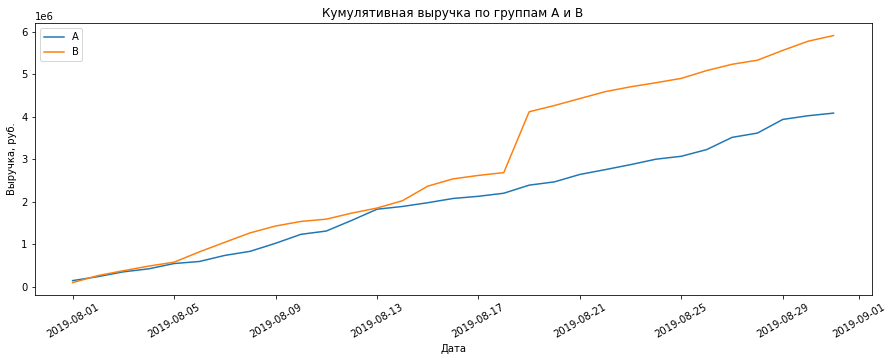

In [30]:
fig,ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.title('Кумулятивная выручка по группам А и В')
plt.legend()
plt.show()

**Вывод**

Спустя 2 недели с начала теста видно, что повышение кумулятивной выручки группы B. Резкий скачок выручки на 3 неделе у группы B, скорее всего, связан с аномально дорогим заказом.

**Анализ кумулятивных данных по среднему чеку**

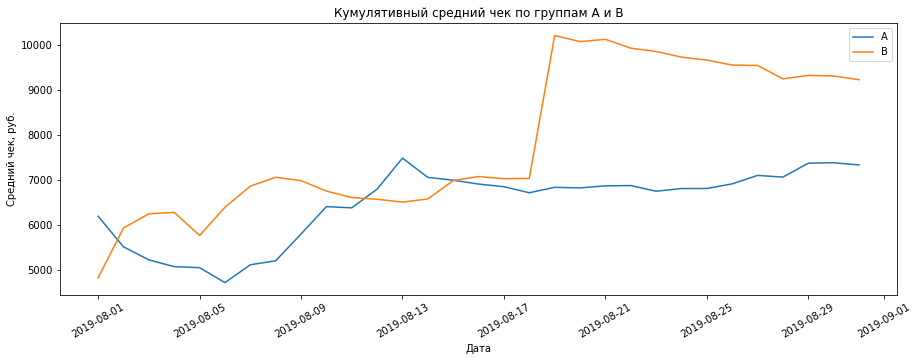

In [31]:
fig,ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.title('Кумулятивный средний чек по группам А и В')
plt.legend()
plt.show()

In [32]:
# общий датафрейм с данными о кумулятивной выручке
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

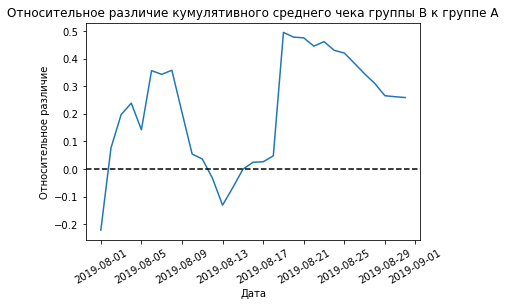

In [33]:
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']
    )-1
)
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.title('Относительное различие кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод**

График кумулятивного среднего чека по группам подтверждает версию о том, что на 3 неделе в группе B был аномально дорогой заказ (также наблюдается резкий скачок графика вверх). С середины месяца группа B также показывает лучшие результаты по среднему чеку.

График относительного различия кумулятивного среднего чека показывает скачки данных в обе стороны, что говорит о наличии выбросов.

**Анализ кумулятивных данных по конверсии**

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

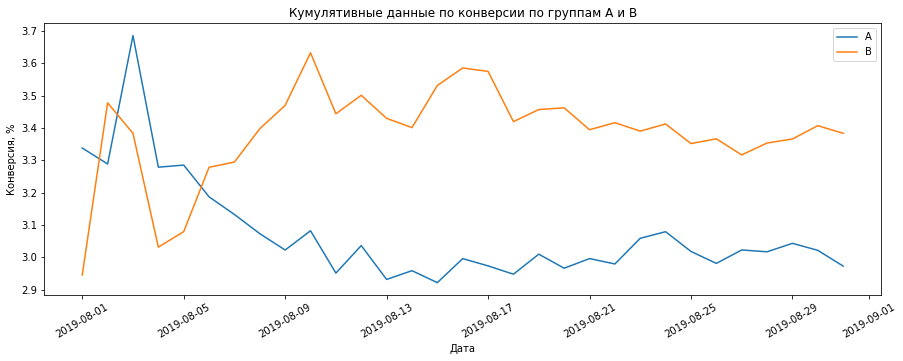

In [35]:
fig,ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.title('Кумулятивные данные по конверсии по группам А и В')
plt.legend()
plt.show()

In [36]:
# общий датафрейм с данными
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

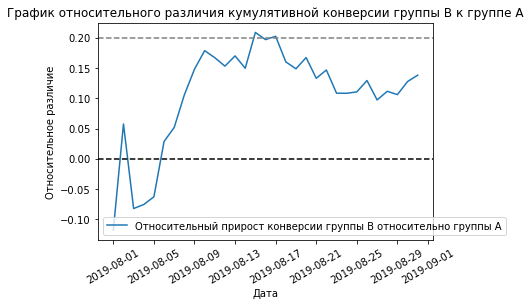

In [37]:
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
    label='Относительный прирост конверсии группы B относительно группы A'
)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.title('График относительного различия кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=30)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

**Вывод**

График кумулятивной конверсии показывает лучшие результаты у группа B с большими скачками данных. Но оба графика имеют более плавное движение к концу месяца, что говорит о нормализации данных и возможности прекратить тест.

График относительного различия кумулятивной конверсии также с 3 недели показывает нормализацию данных, хотя в начале месяца наблюдаются резкие скачки.

#### 4.1.2 Проверка гипотез на "сырых" данных <a id="4.1.2"></a>

**Датафреймы с данными о количестве пользователей на каждый день для каждой группы теста**

In [38]:
visitorsA_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsA_daily.columns = ['date', 'visitorsA_daily']

In [39]:
visitorsA_cummulative = (
    visitorsA_daily.apply(
        lambda x: visitorsA_daily[visitorsA_daily['date'] <= x['date']]
        .agg({'date': 'max', 'visitorsA_daily': 'sum'}),
        axis=1)
)

visitorsA_cummulative.columns = ['date', 'visitorsA_cummulative']

In [40]:
visitorsB_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsB_daily.columns = ['date', 'visitorsB_daily']

In [41]:
visitorsB_cummulative = (
    visitorsB_daily.apply(
        lambda x: visitorsB_daily[visitorsB_daily['date'] <= x['date']]
        .agg({'date': 'max', 'visitorsB_daily': 'sum'}),
        axis=1)
)

visitorsB_cummulative.columns = ['date', 'visitorsB_cummulative']

**Датафреймы с данными о заказах и выручке на каждый день для каждой группы теста**

In [42]:
ordersA_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

ordersA_daily.columns = ['date', 'ordersA_per_date', 'revenueA_per_date']

In [43]:
ordersA_cummulative = (
    ordersA_daily.apply(
        lambda x: ordersA_daily[ordersA_daily['date'] <= x['date']]
        .agg({'date': 'max', 'ordersA_per_date': 'sum', 'revenueA_per_date': 'sum'}),
        axis=1,
    ).sort_values(by=['date'])
)

ordersA_cummulative.columns = ['date', 'ordersA_per_date', 'revenueA_per_date']

In [44]:
ordersB_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

ordersB_daily.columns = ['date', 'ordersB_per_date', 'revenueB_per_date']

In [45]:
ordersB_cummulative = (
    ordersB_daily.apply(
        lambda x: ordersB_daily[ordersB_daily['date'] <= x['date']]
        .agg({'date': 'max', 'ordersB_per_date': 'sum', 'revenueB_per_date': 'sum'}),
        axis=1,
    ).sort_values(by=['date'])
)

ordersB_cummulative.columns = ['date', 'ordersB_per_date', 'revenueB_per_date']

In [46]:
df = (
    ordersA_daily.merge(
        ordersB_daily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersA_cummulative, left_on='date', right_on='date', how='left')
    .merge(ordersB_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsA_daily, left_on='date', right_on='date', how='left')
    .merge(visitorsB_daily, left_on='date', right_on='date', how='left')
    .merge(visitorsA_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsB_cummulative, left_on='date', right_on='date', how='left')
)

**Датафреймы с данными о пользователях и количестве их заказов для каждой группы теста**

In [47]:
ordersA_by_users = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersA_by_users.columns = ['userId', 'orders']

In [48]:
ordersB_by_users = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersB_by_users.columns = ['userId', 'orders']

**Датафреймы, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули**

In [49]:
sampleA = pd.concat(
    [ordersA_by_users['orders'],
     pd.Series(
         0,
         index=np.arange(
             df['visitorsA_daily'].sum() - len(ordersA_by_users['orders'])
         ),
         name='orders'
     )
    ],
    axis=0
)

In [50]:
sampleB = pd.concat(
    [ordersB_by_users['orders'],
     pd.Series(
         0,
         index=np.arange(
             df['visitorsB_daily'].sum() - len(
                 ordersB_by_users['orders'])
         ),
         name='orders'
     )
    ],
    axis=0
)

**Статистическая значимость различия конверсии по результатам месяца теста (тест Манна-Уитни)**

* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит конверсию заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа.

In [51]:
results = stats.mannwhitneyu(sampleA, sampleB)

In [52]:
'p-value для сравнения конверсии между группами: {0:.3f}'.format(results.pvalue)

'p-value для сравнения конверсии между группами: 0.017'

In [53]:
'относительное различие в конверсии между группами: {0:.3f}'.format(
    sampleB.mean() / sampleA.mean() - 1
)

'относительное различие в конверсии между группами: 0.138'

In [54]:
alpha = .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Отвергаем нулевую гипотезу.


**Вывод по конверсии**

"Сырые" данные позволяют нам отвергнуть нулевую гипотезу о различии конверсии заказа. В конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

Анализ конверсии:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит конверсию заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа.

**Пороговое значение alpha:** 0.05

**Анализ средних чеков по "сырым" данным**

* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит средний чек заказа.

In [55]:
results = stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'],
        orders[orders['group']=='B']['revenue']
)

In [56]:
'p-value для сравнения средних чеков между группами: {0:.3f}'.format(results.pvalue)

'p-value для сравнения средних чеков между группами: 0.729'

In [57]:
'относительное различие среднего чека между группами: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue']
    .mean()
    -1
)

'относительное различие среднего чека между группами: 0.259'

In [58]:
alpha = .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Не получилось отвергнуть нулевую гипотезу.


In [59]:
orders[orders['group']=='B']['revenue'].describe()

count    6.400000e+02
mean     9.230875e+03
std      5.244977e+04
min      5.000000e+01
25%      1.312500e+03
50%      2.965000e+03
75%      8.355250e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [60]:
orders[orders['group']=='A']['revenue'].describe()

count      557.000000
mean      7333.578097
std      11847.549587
min         50.000000
25%       1188.000000
50%       3000.000000
75%       8280.000000
max      93940.000000
Name: revenue, dtype: float64

**Вывод по среднему чеку**

"Сырые" данные позволяют нам принять нулевую гипотезу о различии среднего чека заказа. В среднем чеке между группами нет статистически значимых различий. Относительное различие среднего чека между группами 26%, что вероятно связано с выбросами.

Анализ среднего чека:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит средний чек заказа.

**Пороговое значение alpha:** 0.05

#### 4.1.3 Вывод

Анализ конверсии по "сырым" данным показал, что:
* В конверсии между группами есть статистически значимые различия. Так как уровень значимости менее 5%, мы отвергаем нулевую гипотезу о том, что добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит конверсию заказа.
* Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

Анализ среднего чека по "сырым" данным показал, что:
* Статистически значимых отличий в среднем чеке между группами нет, так как уровень значимости значительно больше 5%. Мы принимаем нулевую гипотезу о том, что добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа.
* Относительное различие среднего чека между группами 26%, что вероятно связано с выбросами.



### 4.2 Анализ аномалий <a id="4.2"></a>

In [61]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Аномалии в количестве заказов**

In [62]:
# сделаем выборку с уникальными пользователями и количеством сделанных ими заказов
orders_by_users = (
  orders.groupby('visitorId', as_index=False)
  .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['userId', 'orders']

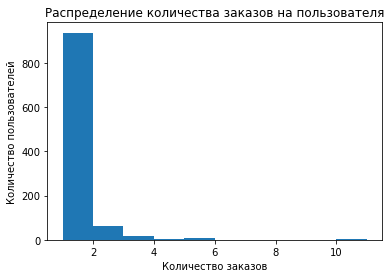

In [63]:
# отразим распределение, чтобы увидеть, сколько заказов чаще всего делали пользователи
plt.hist(orders_by_users['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Распределение количества заказов на пользователя')
plt.show()

**На графике видим, что большинство пользователей делают только 1 заказ. А также есть выбросы с 5-10 заказами.**

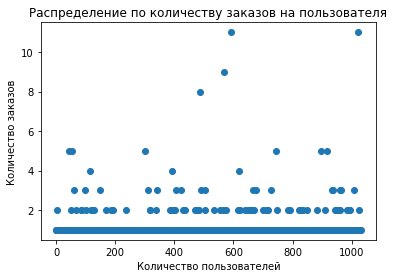

In [64]:
# посмотри на данные немного иначе, чтобы точнее увидеть, как распределется количество заказов и выбросы
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Распределение по количеству заказов на пользователя')
plt.show()

**На графике видим, что большинство пользователей делают только 1 заказ, но также много людей, которые делают 2 заказа. Далее разброс становится уже большим и есть все несколько человек, у кого больше 8 заказов.**

In [65]:
orders_by_users['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

In [66]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 2., 4.])

**Вывод о количестве заказов**

Проанализировали данные по количеству заказов, которые делают пользователи и выяснили, что чаще всего пользователи делают только 1 заказ. Но так как 95% пользователей делают 1-2 заказа, мы используем для анализа именно это ограничение.

**Аномалии в стоимости заказов**

In [67]:
# сделаем выборку с уникальными пользователями и суммой сделанных ими заказов
revenue_by_users = (
  orders.groupby('visitorId', as_index=False)
  .agg({'revenue': 'sum'})
)

revenue_by_users.columns = ['userId', 'revenue']

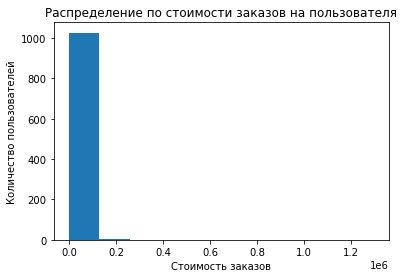

In [68]:
# отразим распределение, чтобы увидеть, на какую сумму пользователи чаще всего делали заказы
plt.hist(revenue_by_users['revenue'])
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.title('Распределение по стоимости заказов на пользователя')
plt.show()

**На графике видим, что большинство пользователей делают заказы на сумму менее 20 тысяч рублей. Выбросы есть, но их плохо видно, поэтому надо построить точечный график распределения заказов по стоимости.**

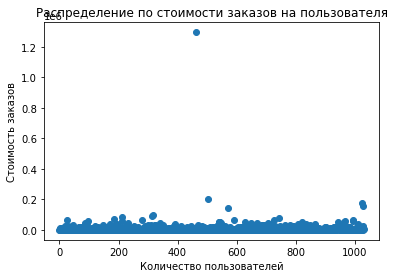

In [69]:
# посмотри на данные немного иначе, чтобы точнее увидеть, как распределется сумма заказов и выбросы
x_values = pd.Series(range(0, len(revenue_by_users)))
plt.scatter(x_values, revenue_by_users['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('Распределение по стоимости заказов на пользователя')
plt.show()

**На графике видим, что большинство пользователей делают заказы на сумму менее 16-17 тысяч рублей. Есть несколько выбросов и один существенный выброс с суммой заказа большее 1 млн рублей. Ограничим график и рассмотри данные с суммой заказа до 140 тысяч рублей.**

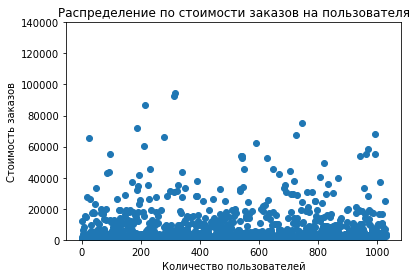

In [70]:
# ограничим данные по выручке до 140 тысяч рублей
x_values = pd.Series(range(0, len(revenue_by_users)))
plt.scatter(x_values, revenue_by_users['revenue'])
plt.ylim(0, 140000)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('Распределение по стоимости заказов на пользователя')
plt.show()

**На графике видим, что большинство пользователей делают заказы на сумму до 20 тысяч рублей. Нужно проверить, являются ли существенными заказы с суммой до 30 тысяч рублей.**

In [71]:
revenue_by_users['revenue'].describe()

count    1.031000e+03
mean     9.692108e+03
std      4.298448e+04
min      5.000000e+01
25%      1.290000e+03
50%      3.250000e+03
75%      9.448000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [72]:
np.percentile(revenue_by_users['revenue'], [90, 95, 99])

array([19260. , 32899.5, 67750. ])

**Вывод о сумме заказа**

Проанализировали данные о сумме заказов, которые делают пользователи, и выяснили, что у 90% пользователей сумма заказа не превышает 20 тысяч рублей. Но так как у 95% пользователей сумма заказа около 33 тысяч рублей, мы используем для анализа именно это ограничение.

**Срезы пользователей с аномальными значениями**

In [73]:
many_orders = pd.concat(
    [
        ordersA_by_users[ordersA_by_users['orders'] > 2]['userId'],
        ordersB_by_users[ordersB_by_users['orders'] > 2]['userId'],
    ],
    axis=0,
)

expensive_orders = orders[orders['revenue'] > 33000]['visitorId']

In [74]:
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#### 4.2.1 Вывод

Определили аномалии как:
* количество заказов больше 2,
* сумма заказа больше 33 000 рублей (данное значение основано на анализе процентилей и медианы).

### 4.3 Анализ подготовленных данных <a id="4.3"></a>

**Датафреймы, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули**

In [76]:
sampleA_filtered = pd.concat(
    [ordersA_by_users[np.logical_not(
        ordersA_by_users['userId'].isin(abnormal_users)
    )]['orders'],
     pd.Series(
         0,
         index=np.arange(
             df['visitorsA_daily'].sum() - len(ordersA_by_users['orders'])
         ),
         name='orders'
     )
    ],
    axis=0
)

In [77]:
sampleB_filtered = pd.concat(
    [ordersB_by_users[np.logical_not(
        ordersB_by_users['userId'].isin(abnormal_users)
    )]['orders'],
     pd.Series(
         0,
         index=np.arange(
             df['visitorsB_daily'].sum() - len(ordersB_by_users['orders'])
         ),
         name='orders')
    ],
    axis=0
)

**Статистическая значимость различия конверсии по результатам месяца теста (тест Манна-Уитни)**

Анализ конверсии:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит конверсию заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа.

In [78]:
results = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)

In [79]:
'p-value для сравнения конверсии между группами: {0:.5f}'.format(results.pvalue)

'p-value для сравнения конверсии между группами: 0.01161'

In [80]:
'относительное различие в конверсии между группами: {0:.3f}'.format(
    sampleB_filtered.mean()/sampleA_filtered
    .mean()
    -1
)

'относительное различие в конверсии между группами: 0.176'

In [81]:
alpha = .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Отвергаем нулевую гипотезу.


**Вывод по конверсии подготовленных данных**

Подготовленные данные позволяют нам отвергнуть нулевую гипотезу о различии конверсии заказа.

В конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 17,6% (в отличие от 13,8% в "сырах" данных).

Принимаем альтернативную гипотезу:
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа.

**Анализ средних чеков по подготовленным данным**

Анализ среднего чека:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа.
* **H₁:** Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит средний чек заказа.

In [82]:
results = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(
            orders['visitorId'].isin(abnormal_users)
        )
    )]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(
            orders['visitorId'].isin(abnormal_users)
        )
    )]['revenue']
)

In [83]:
'p-value для сравнения средних чеков между группами: {0:.3f}'.format(results.pvalue)

'p-value для сравнения средних чеков между группами: 0.814'

In [84]:
'относительное различие среднего чека между группами: {0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(
            orders['visitorId'].isin(abnormal_users)
        )
    )]['revenue'].mean()/orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(
            orders['visitorId'].isin(abnormal_users)
        )
    )]['revenue'].mean()
    -1
)

'относительное различие среднего чека между группами: 0.001'

In [85]:
alpha = .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Не получилось отвергнуть нулевую гипотезу.


**Вывод по среднему чеку по подготовленным данным**

Подготовленные данные позволяют нам принять нулевую гипотезу о различии среднего чека заказа.

В среднем чеке между группами нет статистически значимых различий. Относительное различие среднего чека между группами 0,1% (в отличие от 26% в "сырах" данных, что говорит о большом количестве выбросов в "сырых" данных).

Принимаем нулевую гипотезу:
* **H₀:** Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа.

#### 5.3.1 Вывод

Анализ конверсии показал, что:
* Анализ подготовленных данных показал, что в конверсии между группами есть статистически значимые различия. Так как уровень значимости менее 5%, мы все еще отвергаем нулевую гипотезу. И принимаем, что **добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа**.
* Относительный прирост конверсии группы В к конверсии группы А повысился с 13,8% на "сырых" данных до 17,6% на подготовленных.

Анализ среднего чека показал, что:
* Статистически значимых отличий в среднем чеке между группами нет, так как уровень значимости значительно больше 5%. Значит, мы принимаем нулевую гипотезу, что **добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа**.
* Относительное различие среднего чека между группами уменьшилось с 26% на "сырых" данных до 0,01% на подготовленных.

## 5. Итоги исследования <a id="5"></a>

**По результатам приоритезации гипотез методами ICE и RICE рекомендую брать в работу 2 гипотезы (в порядке приоритета):**
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. (Небольшой охват, но максимальное влияние на пользователей.)

Анализ A/B-тестирования показал, что:
1. Добавление блоков рекомендаций товаров на сайте интернет-магазина изменит конверсию заказа. Относительный прирост конверсии составляет 17,6% на подготовленных данных.
2. Добавление блоков рекомендаций товаров на сайте интернет-магазина не изменит средний чек заказа. Относительное различие среднего чека между группами уменьшилось с 26% на "сырых" данных до 0,01% на подготовленных данных.

**Рекомендация: остановить тест, зафиксировать победу группы B и добавить блоки рекомендации товаров, так как наблюдается значительный прирост конверсии (17,6%) при отсутствии изменений в среднем чеке, что даст нам существенное повышении выручки в компании.**